In [1]:
# Libraries used 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load Data
ww_data = pd.read_csv('Global_Earthquake_Data22.csv', parse_dates=[0])
ww_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26 23:58:05.052000+00:00,41.8050,79.8675,10.000,5.0,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26 23:33:17.641000+00:00,18.7420,145.4868,200.365,4.8,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26 21:42:14.541000+00:00,42.0857,79.9516,10.000,4.9,mb,45.0,77.0,1.223,0.82,...,2023-02-27T00:21:32.040Z,NaN,earthquake,6.27,1.869,0.086,42.0,reviewed,us,us
3,2023-02-26 21:35:01.303000+00:00,14.9364,-104.5563,10.000,4.6,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26 18:58:54.828000+00:00,44.6730,146.5159,134.299,4.5,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us


In [3]:
# get the number of missing data points per column
missing_values_count = ww_data.isnull().sum()

# look at the # of missing points 
missing_values_count[0:22]

time                    0
latitude                0
longitude               0
depth                 592
mag                     0
magType                 1
nst                188836
gap                138772
dmin               212029
rms                 48317
net                     0
id                      0
updated                 0
place                 847
type                    0
horizontalError    219119
depthError         136863
magError           198246
magNst              85130
status                  0
locationSource          0
magSource               0
dtype: int64

In [4]:
# Total missing values
total_cells = np.product(ww_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

19.72661643204005


In [5]:
# Fill or drop missing values
ww_data['depth'].fillna(ww_data['depth'].median(), inplace=True)
ww_data.dropna(subset=['magType'], inplace=True)
ww_data.drop(['nst', 'gap', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst'], axis=1, inplace=True)
ww_data['rms'].fillna(ww_data['rms'].mean(), inplace=True)
ww_data['place'].fillna('Unknown', inplace=True)

In [6]:
# Check for Duplicate Rows
ww_data.drop_duplicates(inplace=True)

In [7]:
# Add year, month, and timing columns
ww_data['year'] = ww_data['time'].dt.year
ww_data['month'] = ww_data['time'].dt.month
ww_data['timing'] = ww_data['time'].dt.time

In [8]:
# check the values of status
ww_data['status'].unique()

array(['reviewed', 'automatic'], dtype=object)

In [9]:
# binary enconding, since status has only 2 categories, we can convert them into 0 or 1
ww_data['status'] = ww_data['status'].apply(lambda x: 1 if x == 'reviewed' else 0)

In [10]:
# get some info about the data
ww_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283131 entries, 0 to 283131
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   time            283131 non-null  datetime64[ns, UTC]
 1   latitude        283131 non-null  float64            
 2   longitude       283131 non-null  float64            
 3   depth           283131 non-null  float64            
 4   mag             283131 non-null  float64            
 5   magType         283131 non-null  object             
 6   rms             283131 non-null  float64            
 7   net             283131 non-null  object             
 8   id              283131 non-null  object             
 9   updated         283131 non-null  object             
 10  place           283131 non-null  object             
 11  type            283131 non-null  object             
 12  status          283131 non-null  int64              
 13  locationSource  283

In [11]:
ww_data.head()

,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,status,locationSource,magSource,year,month,timing
0,2023-02-26 23:58:05.052000+00:00,41.8050,79.8675,10.000,5.0,mb,0.80,us,us6000jrt9,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,1,us,us,2023,2,23:58:05.052000
1,2023-02-26 23:33:17.641000+00:00,18.7420,145.4868,200.365,4.8,mb,0.95,us,us6000jrt6,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,1,us,us,2023,2,23:33:17.641000
2,2023-02-26 21:42:14.541000+00:00,42.0857,79.9516,10.000,4.9,mb,0.82,us,us6000jrss,2023-02-27T00:21:32.040Z,Unknown,earthquake,1,us,us,2023,2,21:42:14.541000
3,2023-02-26 21:35:01.303000+00:00,14.9364,-104.5563,10.000,4.6,mb,0.57,us,us6000jrsv,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,1,us,us,2023,2,21:35:01.303000
4,2023-02-26 18:58:54.828000+00:00,44.6730,146.5159,134.299,4.5,mb,0.82,us,us6000jrs3,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,1,us,us,2023,2,18:58:54.828000


In [12]:
# create a table with the main characteristics of an earthquake, for exploration reasons 
table = ['year', 'mag', 'place','depth', 'timing']

In [13]:
# get the 5 top earthquakes (magnitude)
ww_data.sort_values('mag', ascending=False)[table].head(5)

,year,mag,place,depth,timing
272373,1960,9.5,1960 Great Chilean Earthquake (Valdivia Earthq...,25.0,19:11:20
271221,1964,9.2,"1964 Prince William Sound Earthquake, Alaska",25.0,03:36:16
90927,2011,9.1,"2011 Great Tohoku Earthquake, Japan",29.0,05:46:24.120000
134654,2004,9.1,2004 Sumatra - Andaman Islands Earthquake,30.0,00:58:53.450000
274815,1952,9.0,"89 km ESE of Petropavlovsk-Kamchatsky, Russia",21.6,16:58:30


In [14]:
# get the 5 top earthquakes (depth)
ww_data.sort_values('depth', ascending=False)[table].head(5)

,year,mag,place,depth,timing
116439,2007,4.6,"206 km SE of Levuka, Fiji",700.9,21:22:20.980000
126159,2006,4.6,Fiji region,700.5,22:32:17.080000
220650,1985,5.5,"281 km SE of Levuka, Fiji",700.0,19:14:01.630000
163830,1999,4.8,"223 km ENE of Sola, Vanuatu",700.0,22:25:49.280000
193209,1992,4.5,"259 km WSW of Haveluloto, Tonga",696.0,15:31:08.600000


In [15]:
# create an new Dataframe with earthquakes of 5 or greater
strong_earthequakes = ww_data[ww_data['mag']>=5] 
# looking at the amount of elements in the new data
strong_earthequakes.shape 

(98972, 18)

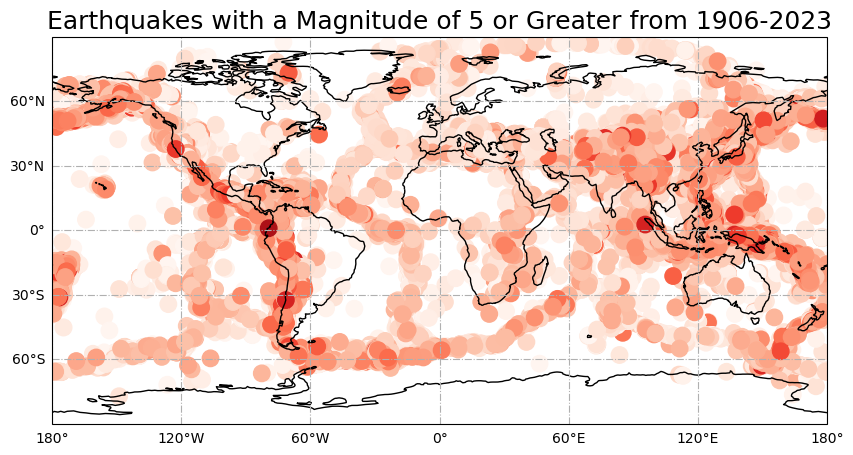

In [16]:
# Earthquakes with a Magnitude of 5 or Greater from 1906-2023
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Zooming in on the graph

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=strong_earthequakes['longitude'], y=strong_earthequakes['latitude'], c =strong_earthequakes['mag'], cmap='Reds', s=140)
plt.title('Earthquakes with a Magnitude of 5 or Greater from 1906-2023', fontsize=18)

plt.show()

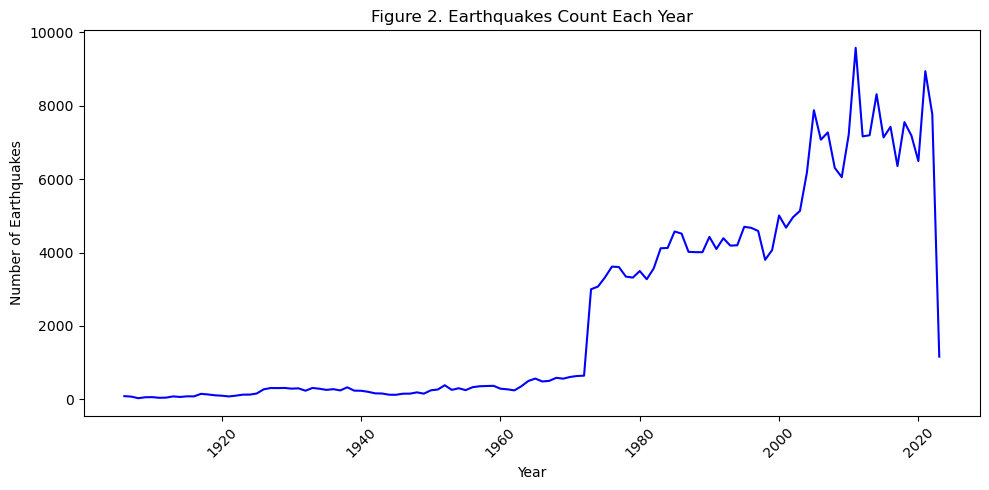

In [17]:
# Figure: Earthquakes Count Each Year
plt.figure(figsize=(10, 5))
earthquake_count_by_year = ww_data['year'].value_counts().sort_index()
sns.lineplot(x=earthquake_count_by_year.index, y=earthquake_count_by_year.values, color='b')
plt.title('Figure 2. Earthquakes Count Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

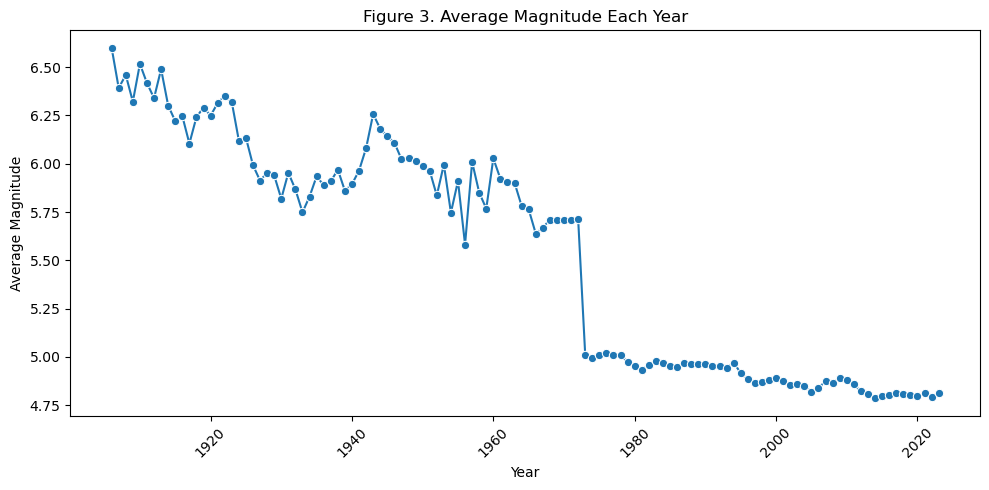

In [18]:
# Figure: Average Magnitude Each Year
plt.figure(figsize=(10, 5))
average_magnitude_by_year = ww_data.groupby('year')['mag'].mean()
sns.lineplot(x=average_magnitude_by_year.index, y=average_magnitude_by_year.values, marker='o')
plt.title('Figure 3. Average Magnitude Each Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# group the numeric columns
numeric_columns = [column for column in ww_data.columns if ww_data.dtypes[column] != 'object']

In [20]:
# calculate the correlation matrix 
corr = ww_data[numeric_columns].corr()

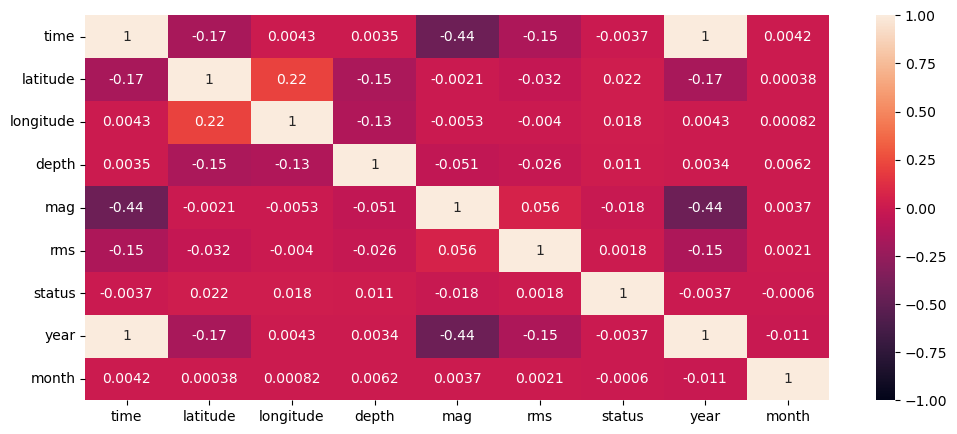

In [21]:
# plot the correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()